In [6]:
import gaussian_mixture_anomaly_detection as ad
import matplotlib
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
import numpy as np
import utils
import models
import ewma

reload(ad)
reload(utils)
reload(models)
reload(ewma)
reload(matplotlib)
%matplotlib inline

In [3]:
eff_train = utils.read_ts('data/eff_train/eff_train1.csv')
eff_train = utils.bad_to_mean(eff_train)
eff_train.head()

/Users/alex/Desktop/GlobalChangersSibur/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good


,tag,timestamp,value,quality
0,Efficiency,01.10.2016 0:00,16137.70,Good
1,Efficiency,01.10.2016 0:00,16060.55,Good
2,Efficiency,01.10.2016 0:00,16633.79,Good
3,Efficiency,01.10.2016 0:00,17578.13,Good
4,Efficiency,01.10.2016 0:00,17331.05,Good


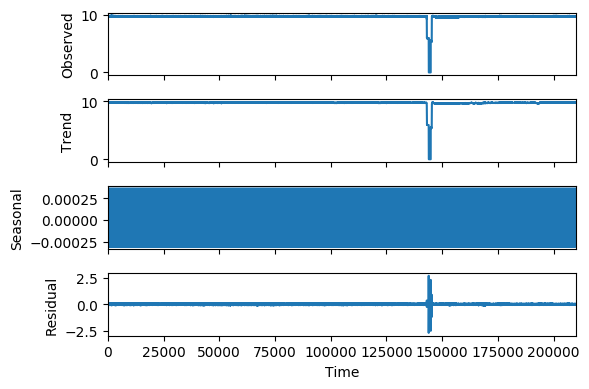

21000


,trend,season,diff
30,9.762740,-0.000300,0.000724
31,9.753068,-0.000301,-0.002822
32,9.745222,0.000134,0.001152
33,9.754340,0.000209,0.001027


In [14]:
origin_ts = eff_train[' value'][40000:250000].values
lag_to_drop=10
df = utils.get_expanded_features(origin_ts,lag_to_drop=10,plot=True)
dropped_origin = utils.get_dropped(origin_ts, lag=10)
print(len(df))
df.loc[30:33]

remove last elements until period
Start probabilities memorization

100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:200: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,min_periods=0,com=5,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


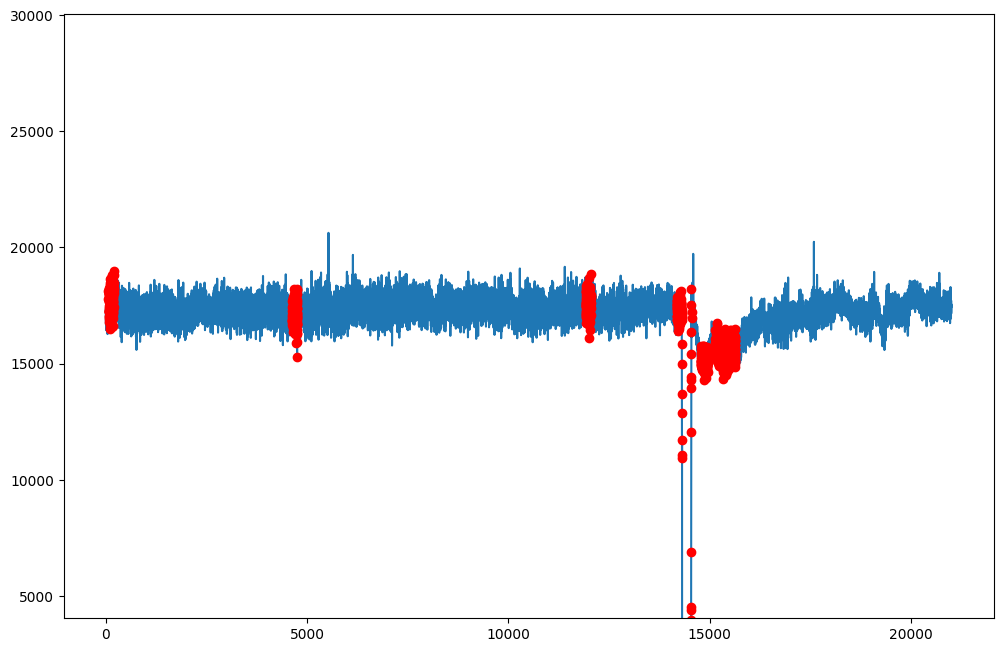

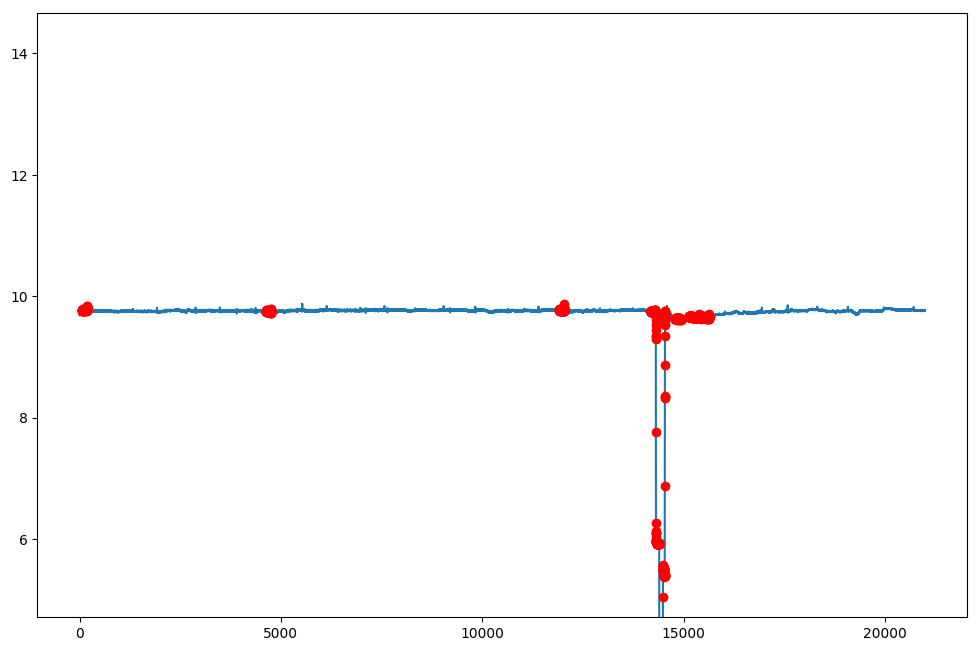

In [ ]:
%%time
# 2 hour predictions
targets = utils.get_targets_with_mixture(df, horizont=2 * 6 * 11, halflife=5,top=0.01, T=24 * 11*6)
utils.plot_with_target(dropped_origin, targets)
utils.plot_with_target(df['trend'].values, targets)
sigmas = ewma.moving_dispersion(df['trend'].values, window=10)
print(models.train_test_run(df, sigmas, targets))